<h1> <i>Session 1: Intro to Linear Regression.</i> </h1>

The following notebook provides an example code of Linear regression analysis, using <b>car prices</b> dataset.
<br>
The dependent variable used in linear regression model is car prices. Our goal is to understand which variables have significant relationship with prices of different cars.
<br>The general sequence of steps for the analysis the following:
1. [Descriptive analysis using pandas and visualization](#pandas)
2. [Confirmatory analysis using statistical tests](#ttest)
3. [Running and Building Linear Regression](#reg)
4. [Interpretation of LR](#interp)
5. [Checking LR assumptions using residual analysis (visual evidence)](#resid)   

<i> <u>Before starting any analysis, first import all the needed libraries.</u></i>

In [1]:
import pandas as pd # pandas for data manipulation, transformation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import numpy as np #for scientific computations
from scipy import stats #for t-test
import statsmodels.api as sm
from statsmodels.formula.api import ols #for linear regression
from statsmodels.api import qqplot #for qq plot
from statsmodels.stats.diagnostic import het_breuschpagan #variance equality test
from statsmodels.stats.diagnostic import linear_rainbow #linearity test
from scipy.stats import shapiro #for checking normality
from statsmodels.stats.outliers_influence import variance_inflation_factor #for checking Multicolinearity

 <h2>1.Descriptive analysis</h2> <a name="pandas"></a>

In [2]:
#importing the data and making a dataframe
data=pd.read_csv("car_data.csv")
print(type(data))

<class 'pandas.core.frame.DataFrame'>


To have an initial understanding of data, a statistical summary, feature names, their datatypes, number of observations, null and NA values there are several methods in pandas library.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 23 columns):
make                 193 non-null object
fuel_type            193 non-null object
num_of_doors         193 non-null object
body_style           193 non-null object
drive_wheels         193 non-null object
engine_location      193 non-null object
wheel_base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb_weight          193 non-null int64
engine_type          193 non-null object
num_of_cylinders     193 non-null object
engine_size          193 non-null int64
fuel_system          193 non-null object
bore                 193 non-null float64
stroke               193 non-null float64
compression_ratio    193 non-null float64
horsepower           193 non-null int64
peak_rpm             193 non-null int64
city_mpg             193 non-null int64
highway_mpg          193 non-nul

As can be seen, for example "fuel_type" is a string variable (object) but price is numeric (float). Each variable contains 193 observations. so there are no missing values.

In [4]:
#have a look at first rows of the dataframe. To change the number of rows (e.g. to 10), add the number as data.head(n=10)
data.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


A useful method that generates various summary statistics is describe(). If the DataFrame includes both numeric and object (e.g., strings) dtypes, it will default to summarizing the numeric data. If .describe() is called on strings, for example, it will return the count, number of unique values, and the most frequent value along with its count.

In [5]:
data.describe()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


From the output, we assume that the distribution of price is quite skewed. 
You can see that 75% of cars are below 16515 USD.

In [6]:
#checking for NAs
data.isnull().any()

make                 False
fuel_type            False
num_of_doors         False
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                 False
stroke               False
compression_ratio    False
horsepower           False
peak_rpm             False
city_mpg             False
highway_mpg          False
price                False
dtype: bool

We can use <code> max(), min(), mean(), median() </code> functions to get respective statistics.

In [7]:
print("Mean:",data.price.mean())
print("Median:",data.price.median())
print("Min:",data.price.min())
print("Max:",data.price.max())

Mean: 13285.025906735751
Median: 10245.0
Min: 5118
Max: 45400


A useful method to see with number of distinct observations per feature is <code>nunique()</code>.
In addition, <code>value_counts()</code> shows the counts for each category in the defined feature.

In [8]:
print(data.nunique())
print("_____________________________ ")
print(data.fuel_type.value_counts())

make                  21
fuel_type              2
num_of_doors           2
body_style             5
drive_wheels           3
engine_location        2
wheel_base            50
length                71
width                 41
height                46
curb_weight          165
engine_type            5
num_of_cylinders       6
engine_size           40
fuel_system            7
bore                  38
stroke                36
compression_ratio     31
horsepower            56
peak_rpm              21
city_mpg              28
highway_mpg           30
price                178
dtype: int64
_____________________________ 
gas       174
diesel     19
Name: fuel_type, dtype: int64


In [9]:
#checking whether there are columns having same value for all observations
#nunique is returning Series with number of distinct observations over requested axis, which in this case is 0(by rows)
#we can also directly get colnames of the noted features,
data.columns[data.nunique()==1]

Index([], dtype='object')

 <h3>1.1.Descriptive analysis using visualization</h3>

To see the visual representation of pairwise relationships in a dataset, a pairplot is used. Note that it only plots numeric
columns.

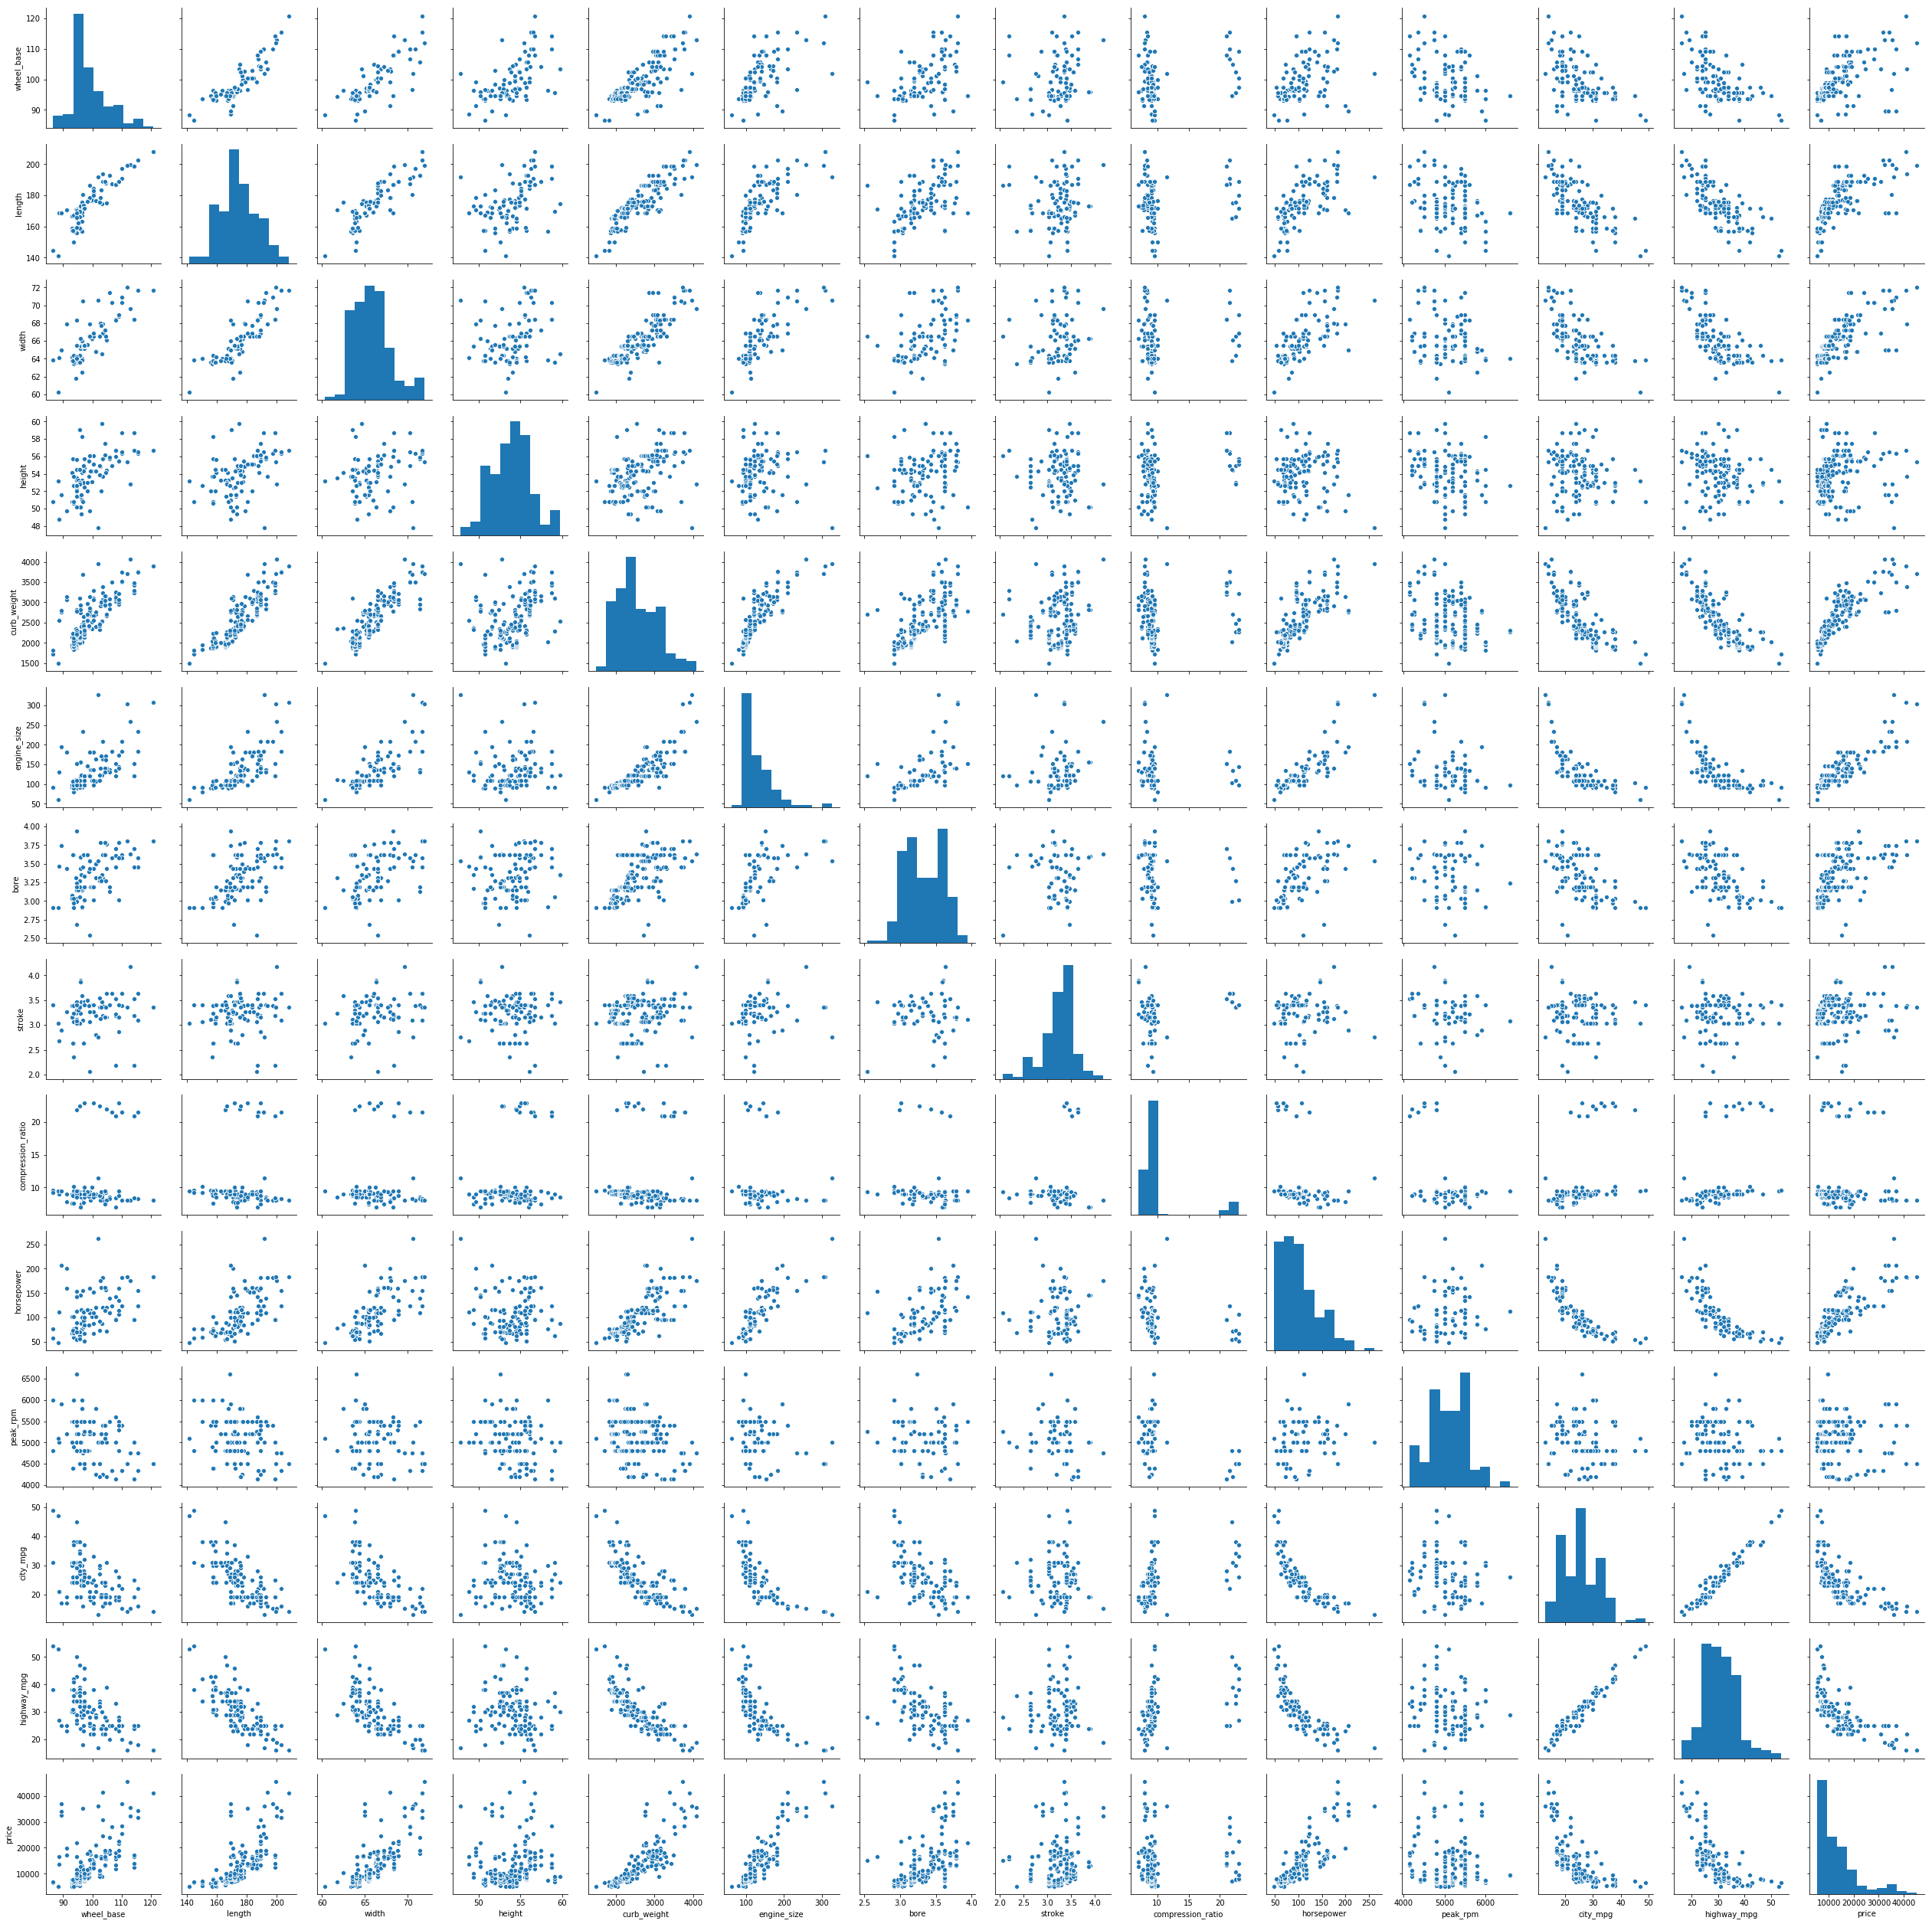

In [10]:
sns.pairplot(data)

To see the patterns interesting us in details, we can plot the pairs using appropriate types of plots.
Let's plot several of them.

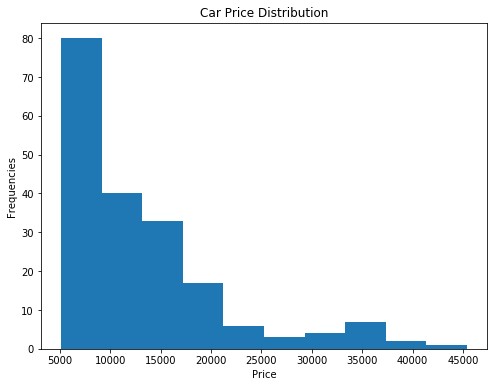

In [11]:
plt.figure(figsize=(8,6)) #making the graph bigger
plt.hist(data.price)
plt.title("Car Price Distribution") #giving a title to the graph
plt.ylabel("Frequencies")#giving title to y axis
plt.xlabel("Price")#giving title to x axis
plt.show()#showing the plot

Histogram confirms that price distribution is right skewed. This hints us that most probably log-linear model (ln(Y) instead of Y) would be more appropriate for this analysis.

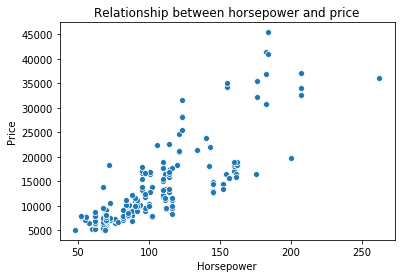

In [12]:
sns.scatterplot(data.horsepower,data.price)
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Relationship between horsepower and price")
plt.show()

The scatter plot shows that there is a positive linear realtionship between price and horsepower of a car.


To explore categorical variables, we will need some other types of plots, e.g a boxplot.
Let's plot the price by fuel type.

In [13]:
#to see the categorical columns:
data.select_dtypes(include="object").columns

Index(['make', 'fuel_type', 'num_of_doors', 'body_style', 'drive_wheels',
       'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system'],
      dtype='object')

In [14]:
#to see the count of values for number of doors
data.num_of_doors.value_counts()

four    112
two      81
Name: num_of_doors, dtype: int64

<h2>2.Confirmatory analysis using statistical tests</h2><a name="ttest"></a>

To see whether the average price differs by the number of doors we will use both visualization and a t-test.
For visualization we will use boxplot.

In [15]:
#absolute mean values of price by number of doors
print("Mean price for two-door cars:",data.price[data.num_of_doors=="two"].mean())
print("Mean price for four-door cars:",data.price[data.num_of_doors=="four"].mean())

Mean price for two-door cars: 12844.246913580248
Mean price for four-door cars: 13603.80357142857


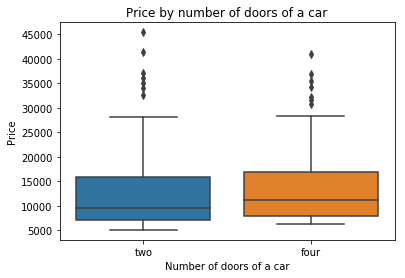

In [16]:
sns.boxplot(x=data.num_of_doors,y=data.price)
plt.xlabel("Number of doors of a car")#giving title to y axis
plt.ylabel("Price")
plt.title("Price by number of doors of a car")
plt.show()

As it can be seen from the plot, there is a slight difference between prices of two and four door cars.
In order to learn whether the difference is statistically significant, we will conduct the t-test.

T-test is used to determine whether the means of two groups are equal to each other. The null hypothesis is that the two means are equal, and the alternative is that they are not. <b>

In [17]:
stats.ttest_ind(data.price[data.num_of_doors=="two"],
               data.price[data.num_of_doors=="four"])

Ttest_indResult(statistic=-0.6427899222652471, pvalue=0.521131300440071)

As we can see from the results of t-test, average price is not significantly different for two and four door cars as p-value is above the 5% significance level.

 <h3>1.2.Checking for correlations (multicollinearity)</h3>

In [18]:
#choosing numeric data
data_numeric = data.select_dtypes(exclude=["object"])

In [19]:
data_numeric.corr()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
wheel_base,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb_weight,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368
engine_size,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531,0.888778
bore,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295
stroke,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007
compression_ratio,0.252234,0.156061,0.188631,0.253934,0.161030,0.025257,-0.004172,0.199600,1.000000,-0.203818,-0.439741,0.314648,0.249669,0.074483
horsepower,0.377040,0.589650,0.621532,-0.081730,0.762154,0.845325,0.572972,0.102913,-0.203818,1.000000,0.101383,-0.833615,-0.812078,0.812453


There are a lot of pairs having high correlation, but the representation is not convenient to see the overall picture, thus we will use some visualizations.

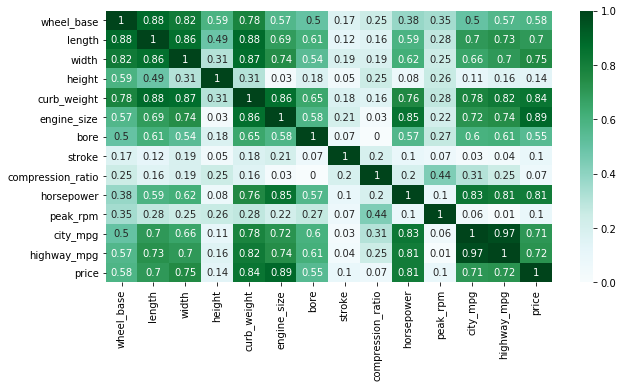

In [20]:
#Let's visualize correlations
plt.figure(figsize=(10,5))
sns.heatmap(data_numeric.corr().abs().round(2),annot=True, cmap = "BuGn")

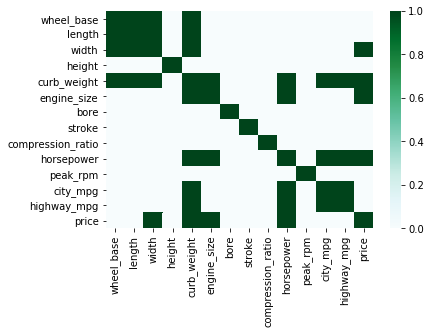

In [21]:
#plot correlation heatmap to see any correlations above or equal to 75% in absolute values
#we will see that number of variables are highly correlated, which will affect the results.
#Thus we will include only several of them in the analysis
sns.heatmap(data_numeric.corr().abs()>=0.75, cmap = "BuGn")

<h2>3.Running and Building Linear Regression</h2><a name="reg"></a>

Let's run linear regression between price and some variables from the data to see what are the predictors of car prices.

We will use <code>ols()</code> function from statsmodels.

<b>First, run the model.</b>

As statsmodels OLS expects numbers, we will transform our categorical variables to dummies. Let's see categories and number of observations in each category for object variables

In [22]:
for i in data.select_dtypes(include="object").columns:
    j=data[i].value_counts()
    print(i,"\n",j,"\n","\n")
    print("--------------------")

make 
 toyota           32
nissan           18
honda            13
mitsubishi       13
mazda            12
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             8
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64 
 

--------------------
fuel_type 
 gas       174
diesel     19
Name: fuel_type, dtype: int64 
 

--------------------
num_of_doors 
 four    112
two      81
Name: num_of_doors, dtype: int64 
 

--------------------
body_style 
 sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64 
 

--------------------
drive_wheels 
 fwd    114
rwd     71
4wd      8
Name: drive_wheels, dtype: int64 
 

--------------------
engine_location 
 front    190
rear       3
Name: engine_location,

In [23]:
#overview of the whole data converted into dummies
pd.get_dummies(data, drop_first=True).head()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,...,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,1,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,1,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,1,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,1,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


<b><u>As we are not interested in all categorical variables, let's subset only variables we need to use in the model.</u></b>

In [24]:
data_ols=data[["price","horsepower", "engine_size"]]

In [25]:
data_ols = pd.concat((data_ols, pd.get_dummies(data['num_of_doors'], drop_first=True)), axis=1)

In [26]:
data_ols.head()

,price,horsepower,engine_size,two
0,13495,111,130,1
1,16500,111,130,1
2,16500,154,152,1
3,13950,102,109,0
4,17450,115,136,0


In [27]:
#setting the varables
Y_linear=data_ols["price"]
X_linear=data_ols.drop("price", axis=1)

In [28]:
# Adding a constant term to the predictor
X_linear=sm.add_constant(X_linear)

In [29]:
model_linear= sm.OLS(Y_linear,X_linear)

<b>Next, build the model.</b>

In [30]:
results=model_linear.fit()

<b>Last, see the summary.</b>

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     265.1
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           1.86e-67
Time:                        16:41:40   Log-Likelihood:                -1850.8
No. Observations:                 193   AIC:                             3710.
Df Residuals:                     189   BIC:                             3723.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8611.4261    862.666     -9.982      0.000   -1.03e+04   -6909.736
horsepower     50.7043     12.917      3.925      0.000      25.225      76.184
engine_size   133.7836     11.734     11.402      0.000     110.638     156.929
two         -1171.0140    529.425     -2.212      0.028   -2215.355    -126.673
==============================================================================
Omnibus:                       13.667   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.052
Skew:                           0.273   Prob(JB):                     4.91e-07
Kurtosis:                       4.821   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>4.Interpretation of the results of Linear Regression</h1><a name="interp"></a>

- <b>R-squared and F-statistics</b>: As Prob (F-statistic) shows our model is statistically significant at 5% significance level, so there is at least one estimated coefficient (besides intercept) that is not null. R-squared is quite big number and it shows that 83% of variance in car prices is explained by the variables included in the model.
- <b>Adj. R-squared</b>: As summary shows it's 82.4% and it is quite close to R-squared, which means that almost all variables included in the model have statistically significant relationship with car prices.
- <b>Statistically significant variables</b>: As p-values of t-statistics show, all variables included in the model are statistically significant at 5% sig. level (p<=0.05).
- <b>Coefficients (continous variable)</b>: Let's interpret for horsepower. For each unit increase in horsepower we will experience on average about 51 dollars increase in mean price of a car.
- <b>Coefficients (categorical variable)</b>: If a car has two doors rather than four then on average 1171 dollars decrease is expected in mean price of a car. 

<h2> <i>Final Model </i> </h2>

Price = -8611.4261 - 1171.0140 * num_of_doors(two)  + 50.7043* horsepower  + 133.7836 engine_size

<h1>5.Checking LR assumptions using residual analysis (visual evidence)</h1><a name="resid"></a>

To check the assumptions using residual analysis we will plot the fitted values vs error terms (residuals). It should not exhibit any patterns (should be randomly distributed) to meet the Linearity, Normality and Independence assumptions.

In [32]:
#residuals of the model
residuals=results.resid
residuals.head(10)

0     257.393585
1    3262.393585
2   -1861.130829
3    2807.174001
4    2035.860690
5    1260.396255
6    2549.382212
7    3759.382212
8    7862.171109
9    6642.675954
dtype: float64

In [33]:
#let's actually get residual values
#first, we need to get predicted values from the results of the model
#second, we should calculate the difference between predicted and true values of cons. conf. index
predicted_values=results.predict()
true_values=data_ols.price
resid=true_values-predicted_values

In [34]:
#we can see that we got the same results
resid.head(10)

0     257.393585
1    3262.393585
2   -1861.130829
3    2807.174001
4    2035.860690
5    1260.396255
6    2549.382212
7    3759.382212
8    7862.171109
9    6642.675954
Name: price, dtype: float64

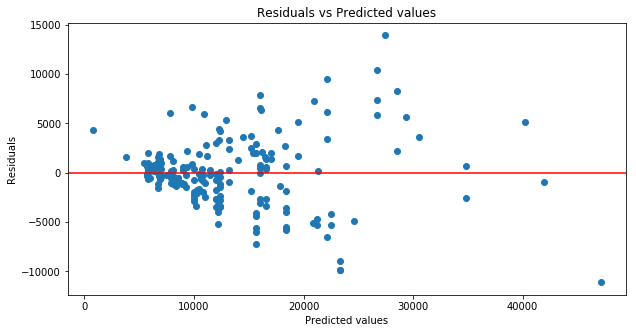

In [35]:
#lets plot predicted values vs residuals
plt.figure(figsize=(10,5))
plt.scatter(predicted_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residuals vs Predicted values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

The residuals vs fitted values plot pattern is random, however we can see an increasing variance as the values increase. Hence, the visual evidence in this case is not enough to make conclusions.

C:\Users\Srbuhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


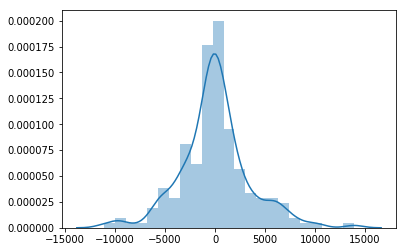

In [36]:
#Normality
#visual presentation- histogram
sns.distplot(residuals)
plt.show()

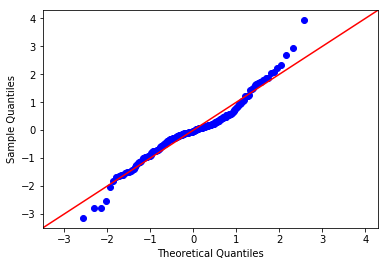

In [37]:
#QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

The residuals distribution plot shows that the distribution is approximately bell-shaped, so based on the plot only we can say that the normality assumption is held.
QQ-plot shows that the there are several outliers, but overall the dots are along the line.

<h2>Diagnostic tests for LINE assumptions </h2>

In [38]:
#Linearity 
#The null hypothesis assumes that the regression is correctly modelled as linear
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results)
print(list(zip(rnames, rainbow)))

[('fstat', 1.006919591417233), ('p-value', 0.48739625675795206)]


Linearity assumption is held, since we have a large p-value.

In [39]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results.model.exog)
print(list(zip(bnames, breush)))


[('Lagrange multiplier statistic', 63.4809339060186), ('p-value', 1.05983589170256e-13), ('f-value', 30.87807036206706), ('f p-value', 2.72501030765057e-16)]


In [40]:
#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
snames=['The test statistic', 'p-value']
shapiro=shapiro(residuals)
print(list(zip(snames, shapiro)))

[('The test statistic', 0.9631668925285339), ('p-value', 6.10110982961487e-05)]
